In [ ]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import data
metadata = pd.read_csv('/content/drive/MyDrive/CSCI_567/Project/application_metadata.csv')

In [ ]:
metadata['status'].value_counts()

ISS     3139764
ABN      977521
PEND     798795
Name: status, dtype: int64

In [ ]:
#Removing pending patents
metadata = metadata[metadata['status'] != 'PEND']

In [ ]:
metadata['status'].value_counts()

ISS    3139764
ABN     977521
Name: status, dtype: int64

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117285 entries, 0 to 4915887
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   doc-id                    int64  
 1   examiner_experience       int64  
 2   examiner_allowance_ratio  float64
 3   class_saturation          int64  
 4   subclass_saturation       int64  
 5   customer_experience       int64  
 6   customer_success_ratio    float64
 7   status                    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 282.7+ MB


In [ ]:
metadata.describe()

,doc-id,examiner_experience,examiner_allowance_ratio,class_saturation,subclass_saturation,customer_experience,customer_success_ratio
count,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06
mean,1.234501e+07,5.029763e+02,7.643155e-01,1.675307e+04,2.954730e+03,5.029763e+02,7.643155e-01
std,5.607356e+06,1.320641e+03,2.228962e-01,2.099201e+04,3.829545e+03,1.320641e+03,2.228962e-01
min,2.618355e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.010214e+07,1.030000e+02,6.315789e-01,2.936000e+03,4.590000e+02,1.030000e+02,6.315789e-01
50%,1.140475e+07,2.630000e+02,8.390142e-01,8.520000e+03,1.750000e+03,2.630000e+02,8.390142e-01
75%,1.262732e+07,5.720000e+02,9.437908e-01,2.127600e+04,4.032000e+03,5.720000e+02,9.437908e-01
max,9.603000e+07,2.694000e+04,1.000000e+00,1.255260e+05,3.846600e+04,2.694000e+04,1.000000e+00


In [ ]:
#Data seems to be skewed by earlier results. Taking only last ~1,000,000
metadata = metadata[3000000:]

In [ ]:
#Encoding target feature
metadata['status'] = metadata['status'].replace({'ISS': 1, 'ABN': 0})
metadata['status'].value_counts()

1    844069
0    273216
Name: status, dtype: int64

In [ ]:
#Splitting into train and test (not shuffling to keep data sequential)
from sklearn.model_selection import train_test_split

X = metadata.drop(['status', 'doc-id'], axis=1)
y = metadata['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [ ]:
#Scaling data using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

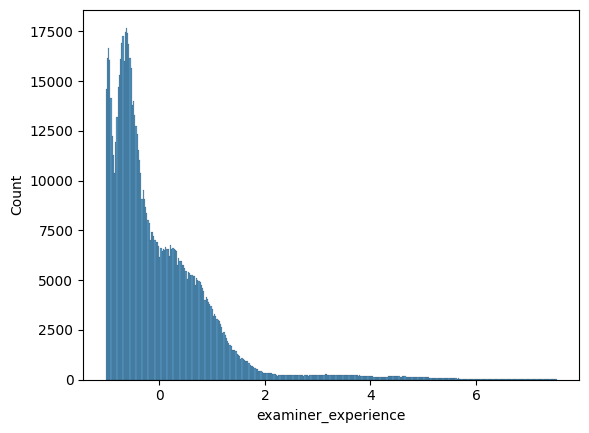

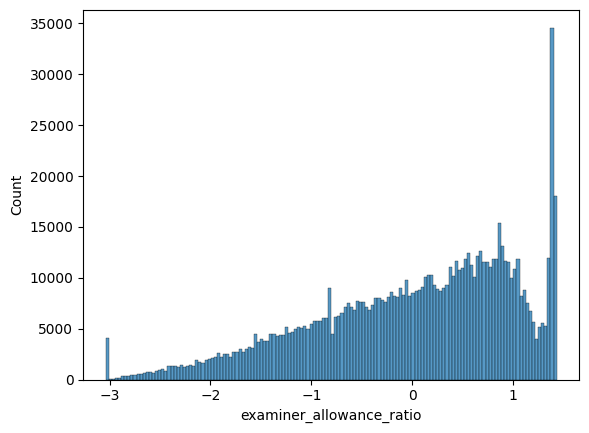

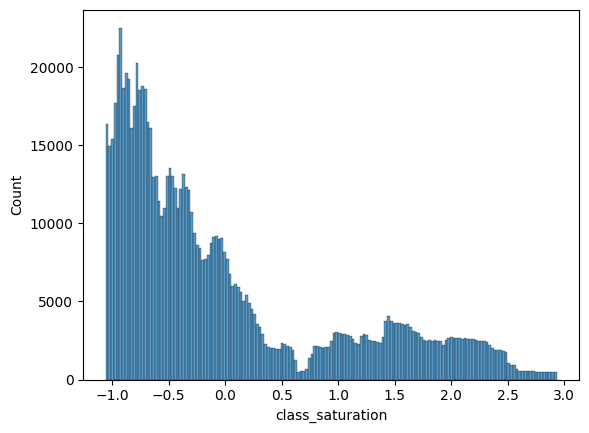

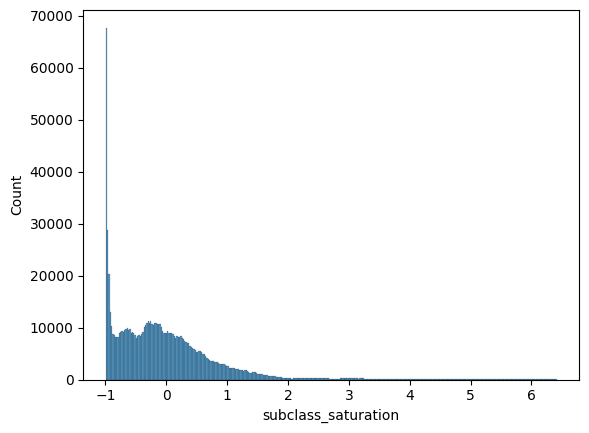

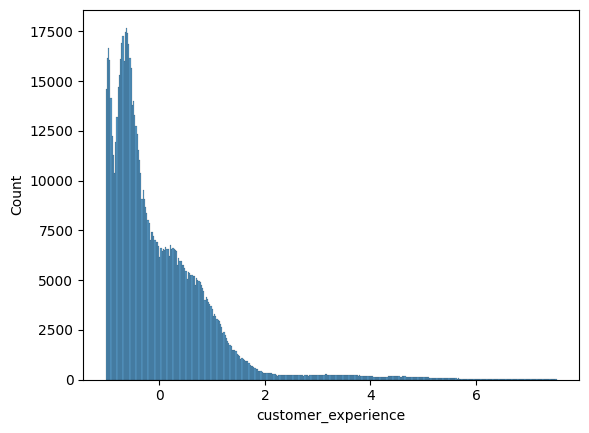

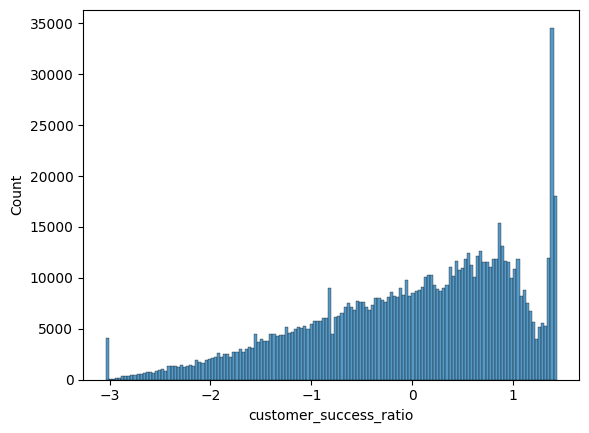

In [ ]:
#Plotting distributions for relevant features in training set after scaling
for feature in ['examiner_experience', 'examiner_allowance_ratio', 'class_saturation', 'subclass_saturation', 'customer_experience', 'customer_success_ratio']:
  sns.histplot(X_train[feature])
  plt.show()

In [ ]:
X_train.describe()

,examiner_experience,examiner_allowance_ratio,class_saturation,subclass_saturation,customer_experience,customer_success_ratio
count,8.938280e+05,8.938280e+05,8.938280e+05,8.938280e+05,8.938280e+05,8.938280e+05
mean,-6.707733e-17,3.693307e-16,5.043121e-17,3.680588e-17,-6.707733e-17,3.693307e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.014396e+00,-3.038604e+00,-1.056936e+00,-9.940641e-01,-1.014396e+00,-3.038604e+00
25%,-6.667279e-01,-6.704843e-01,-7.615958e-01,-6.823690e-01,-6.667279e-01,-6.704843e-01
50%,-3.060630e-01,1.696502e-01,-3.698908e-01,-1.864905e-01,-3.060630e-01,1.696502e-01
75%,4.201407e-01,8.056560e-01,4.077194e-01,3.529337e-01,4.201407e-01,8.056560e-01
max,7.524590e+00,1.432253e+00,2.932759e+00,6.412445e+00,7.524590e+00,1.432253e+00


Model Training and Evaluation

# Decision Trees

In [ ]:
from sklearn.tree import _tree
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.model_selection import GridSearchCV

# fit tree on full data

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
colnames = metadata.columns[1:-1]
colnames

Index(['examiner_experience', 'examiner_allowance_ratio', 'class_saturation',
       'subclass_saturation', 'customer_experience', 'customer_success_ratio'],
      dtype='object')

In [ ]:
data = tree.export_graphviz(clf, out_file=None,
                      feature_names=colnames,
                      class_names=["ISS", "ABN"],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(data)
# graph.view() # way too big

# Interpretable If-then ruleset

In [ ]:
'''def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}then {}".format(indent, tree_.value[node]))

    recurse(0, 1)'''

In [ ]:
# tree_to_code(clf, colnames)

### No interpretability

# Cost-Complexity Pruning

In [ ]:
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
avg_acc_per_fold = []
# kf = KFold(n_splits=5)
for ccp_alpha in ccp_alphas[:5]:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    '''for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(y_pred)
        print(accuracy_score(y_test, y_pred))
        #raise NotImplementedError'''

    acc_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring = "accuracy"))
    avg_acc_per_fold.append(acc_score)
    clfs.append(clf)
    print("Number of nodes in the tree is:", clf.tree_.node_count)
    print("alpha:                         ",ccp_alpha)
    print("mean acc of 5-fold cv:         ", acc_score)
    print()

Number of nodes in the tree is: 444329
alpha:                          0.0
mean acc of 5-fold cv:          0.6255154235490497

Number of nodes in the tree is: 444321
alpha:                          4.155481495640901e-07
mean acc of 5-fold cv:          0.6255154235490497

Number of nodes in the tree is: 444321
alpha:                          4.195438048483601e-07
mean acc of 5-fold cv:          0.6255154235490497

Number of nodes in the tree is: 444289
alpha:                          4.3573672363198063e-07
mean acc of 5-fold cv:          0.6255154235490497

Number of nodes in the tree is: 444281
alpha:                          4.3659843106170826e-07
mean acc of 5-fold cv:          0.6255154235490497



In [ ]:
ccp_alpha_indices = [0, -40000, -20000, -10000, -5000, -2500, -1000, -500, -250, -100, -50, -25, -10, -5, -2, -1]
mapped_ccps = [ccp_alphas[i] for i in ccp_alpha_indices]
mapped_ccps

[0.0,
 1.2786096909664308e-06,
 1.5911587265360026e-06,
 1.9655490151327103e-06,
 2.3674687603703965e-06,
 2.7748144519656583e-06,
 3.4740115530143513e-06,
 4.284183122481793e-06,
 5.806619452473601e-06,
 1.161591408571042e-05,
 2.5606119819531387e-05,
 5.573136932646161e-05,
 0.00020124205714651053,
 0.0011071609297571283,
 0.00729279609761993,
 0.03940234717853264]

In [ ]:
clfs = []
avg_acc_per_fold_last_alphas = []

In [ ]:
# kf = KFold(n_splits=5)
for ccp_alpha in mapped_ccps:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    acc_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring = "accuracy"))
    avg_acc_per_fold_last_alphas.append(acc_score)
    clfs.append(clf)
    print("Number of nodes in the tree is:", clf.tree_.node_count)
    print("alpha:                         ",ccp_alpha)
    print("mean acc of 5-fold cv:         ", acc_score)
    print()

Number of nodes in the tree is: 444329
alpha:                          0.0
mean acc of 5-fold cv:          0.6255154235490497

Number of nodes in the tree is: 215325
alpha:                          1.2786096909664308e-06
mean acc of 5-fold cv:          0.6387457094653557

Number of nodes in the tree is: 122667
alpha:                          1.5911587265360026e-06
mean acc of 5-fold cv:          0.6478472368285622

Number of nodes in the tree is: 65677
alpha:                          1.9655490151327103e-06
mean acc of 5-fold cv:          0.6675593067122534

Number of nodes in the tree is: 32299
alpha:                          2.3674687603703965e-06
mean acc of 5-fold cv:          0.6878603042196038

Number of nodes in the tree is: 14621
alpha:                          2.7748144519656583e-06
mean acc of 5-fold cv:          0.7075992249068055

Number of nodes in the tree is: 4897
alpha:                          3.4740115530143513e-06
mean acc of 5-fold cv:          0.733900481971923



# gets to 77 percent

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for validation split")
ax.plot(mapped_ccps, avg_acc_per_fold_last_alphas, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
best_alpha = mapped_ccps[np.argmax(avg_acc_per_fold)]

IndexError: ignored